## 線形回帰(最急降下法)

### データの準備

In [52]:
import pandas as pd
df = pd.read_csv('data/sample_data.csv')

In [53]:
df

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674
5,51,16.068166
6,55,23.183599
7,62,22.212595
8,83,29.357010
9,103,37.565129


### データの可視化

In [54]:
import seaborn as sns

<AxesSubplot:xlabel='space', ylabel='rent'>

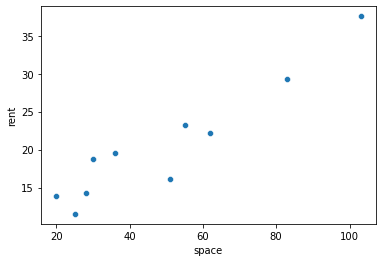

In [55]:
sns.scatterplot(x="space", y="rent", data=df)

### 損失関数の定義

In [56]:
import numpy as np

x = df['space'].values
y = df['rent'].values

def cost_func(theta_0, theta_1, x, y):
    return np.mean(np.square(y - (theta_0 + theta_1 * x)))

cost_func(5, 7, x=x, y=y)

138703.20244638805

### 損失関数の可視化

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

# どの粒度で降下させるか
n0 = n1 = 300

# θ0（切片が取りそうな値を大雑把に）
min_0 = -20
max_0 = 20
# θ１（傾きが取りそうな値を大雑把に
min_1 = -1
max_1 = 1

# θそれぞれの範囲内で300で区切る
theta_0 = np.linspace(min_0, max_0, n0)
theta_1 = np.linspace(min_1, max_1, n1)

# 格子列をつくる（[1,2,3,4]であれば[1,2,3,4]の行を4行分作る）
theta_0_ax, theta_1_ax = np.meshgrid(theta_0, theta_1)

# XとYの総当りでZを生成する。productはイテレータを返す。
z = [cost_func(*param, x=x, y=y) for param in list(product(theta_0, theta_1))]

# 300 300にする。XとYにあわせる
Z = np.array(z).reshape(n0, n1)

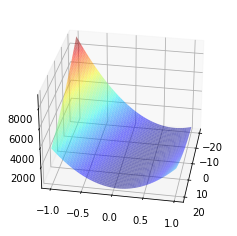

In [70]:
ax = plt.axes(projection="3d")

# X, Y, Zが２次元である必要がある
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)
ax.view_init(elev=30, azim=10)